   Episode    Reward  Length  TotalSteps
0        0 -1.151127       6           7
1        1 -1.554505       9          16
2        2 -0.409865       5          21
3        3 -0.450615       4          25
4        4 -1.635765       8          33


/tmp/ipykernel_18866/43891907.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['smoothed_' + METRIC] = filtered_df[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()


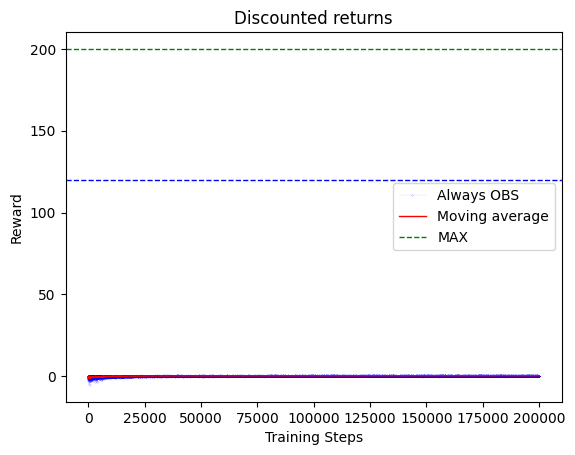

In [1]:
import pandas as pd
episode_df = pd.read_csv("logdir/MBRLCartpole-v0_200000__2023_06_18_17_13.csv")

print(episode_df.head())

import matplotlib.pyplot as plt

METRIC = "Reward"
ROLLING_WINDOW = 20
FROM = 0
UNTIL = 200000
BEST_RESULTS_NO_OBS_COST = 200
ALWAYS_OBS = BEST_RESULTS_NO_OBS_COST*0.6

metrics_df_no_na = episode_df.dropna(how='any', subset=[METRIC, 'TotalSteps'])

# Filter the DataFrame for TotalSteps > FROM and TotalSteps < UNTIL
filtered_df = metrics_df_no_na[(metrics_df_no_na['TotalSteps'] > FROM) & (metrics_df_no_na['TotalSteps'] < UNTIL)]

# Calculate the moving average using a window size of ROLLING_WINDOW
filtered_df['smoothed_' + METRIC] = filtered_df[METRIC].rolling(window=ROLLING_WINDOW, min_periods=1).mean()

# Plot the original data points and the smoothing line
plt.plot(filtered_df['TotalSteps'], filtered_df[METRIC], marker='o', linestyle='-', color='b', linewidth=0.05, markersize=0.1)
plt.plot(filtered_df['TotalSteps'], filtered_df['smoothed_' + METRIC], linestyle='-', color='r', linewidth=1, markersize=1)
plt.axhline(y=BEST_RESULTS_NO_OBS_COST, color='g', linestyle='--', linewidth=1)
plt.axhline(y=ALWAYS_OBS, color='b', linestyle='--', linewidth=1)

plt.xlabel('Training Steps')
plt.ylabel(METRIC)
plt.title('Discounted returns')
plt.legend(['Always OBS', 'Moving average', 'MAX'])
plt.show()
